In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pcoord(x, y):
    """
    Convert x, y to polar coordinates r, az (geographic convention)
    r,az = pcoord(x, y)
    """
    r = np.sqrt(x**2 + y**2)
    az = np.degrees(np.arctan2(x, y))
    # az[where(az<0.)[0]] += 360.
    az = (az+360.)%360.
    return r, az


def xycoord(r, az):
    """
    Convert r, az [degrees, geographic convention] to rectangular coordinates
    x,y = xycoord(r, az)
    """
    azr = np.deg2rad( az )
    x = r * np.sin(azr)
    y = r * np.cos(azr)
    return x, y


def dist_az_to_target(x,y,xt,yt):
    dx = xt-x
    dy = yt-y
    r, az = pcoord(dx,dy)
    return r, az

knots2mps = 0.5144

def course_to_steer(x, y, xt, yt, drift_speed, drift_az, time_interval):
    # offset position according to drift
    dx, dy = xycoord( drift_speed * time_interval, drift_az)
    xp = x+dx
    yp = y+dy
    r, az = dist_az_to_target(xp, yp, xt, yt)
    return az

In [3]:
xstart, ystart = 361825.00, 4597187.00 # point just south of Nobska lighthouse
xend,   yend   = 363789.90, 4591999.15

ss = 1. # m/s - swim speed

tr, traz = dist_az_to_target(xstart,ystart,xend,yend)
print( 'Rhumb line distance: {:.0f} m, bearing {:0.1f}'.format(tr, traz) )
print( 'Swim time for rhumb line: {:.2f} h'.format(tr/ss/3600.) )

Rhumb line distance: 5547 m, bearing 159.3
Swim time for rhumb line: 1.54 h


### Case 1: Steady currents

In [4]:
dt = 60.
t = np.arange(0., 6.2*3600.+dt, dt)
# steady flow (ebb is negative)
cs = -1. * np.ones_like(t) * knots2mps
cdir = 57. * np.ones_like(t) # flood direction
uc,vc = xycoord(cs, cdir)

### Strategy 1: Aim for beach

42 m from beach. Distance swam: 6660 m in 111 min.


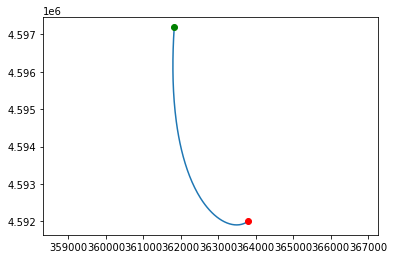

In [20]:
x = np.nan * np.ones_like(t)
y = np.nan * np.ones_like(t)
cumt = 0.0
swim_dist = 0.0

i = 0
x[0], y[0] = xstart, ystart
dist_to_beach, swim_az = dist_az_to_target( x[0], y[0], xend, yend )

while ( np.abs( dist_to_beach ) > ss*dt) and (i < len(t)-1):
    # print( dist_to_beach )
    uswim, vswim = xycoord( ss, swim_az )
    swim_dist += ss*dt
    x[i+1] = x[i] + dt * ( 0.5 * (uc[i] + uc[i+1]) + uswim )
    y[i+1] = y[i] + dt * ( 0.5 * (vc[i] + vc[i+1]) + vswim )
    dist_to_beach, swim_az = dist_az_to_target( x[i+1], y[i+1], xend, yend )

    cumt += dt
    i +=1
    
print('{:.0f} m from beach. Distance swam: {:.0f} m in {:.0f} min.'.format(dist_to_beach, swim_dist, cumt/60.))                  

plt.plot(x,y)
plt.plot(xstart, ystart, 'og')
plt.plot(xend, yend, 'or')
_= plt.axis('equal')

### Stategy 2: Aim to offset drift

In [22]:
x = np.nan * np.ones_like(t)
y = np.nan * np.ones_like(t)
cumt = 0.0
swim_dist = 0.0


x[0], y[0] = xstart, ystart
dist_to_beach, swim_az = dist_az_to_target( x[0], y[0], xend, yend )
print('Initial azimuth:', swim_az)

# the appropriate course to steer depends on the net drift over the entire transit
ucbar = np.mean(uc)
vcbar = np.mean(vc)
spd_bar, cdir_bar = pcoord( ucbar, vcbar )
swim_az = course_to_steer( xstart, ystart, xend, yend, spd_bar, cdir_bar, 111*60 )
print(swim_az)

Initial azimuth: 159.25580021480891
124.47450786654804


5547 m from beach. Distance swam: 22320 m in 372 min.


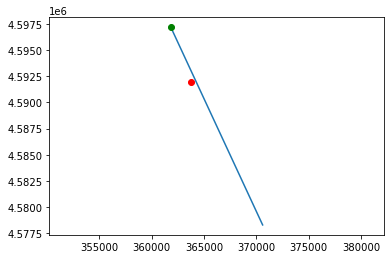

In [23]:
i = 0
while ( np.abs( dist_to_beach ) > ss*dt) and (i < len(t)-1):

    uswim, vswim = xycoord( ss, swim_az )
    swim_dist += ss*dt
    x[i+1] = x[i] + dt * ( 0.5 * (uc[i] + uc[i+1]) + uswim )
    y[i+1] = y[i] + dt * ( 0.5 * (vc[i] + vc[i+1]) + vswim )
    cumt += dt
    i +=1
    
print('{:.0f} m from beach. Distance swam: {:.0f} m in {:.0f} min.'.format(dist_to_beach, swim_dist, cumt/60.))
plt.plot(x,y)
plt.plot(xstart, ystart, 'og')
plt.plot(xend, yend, 'or')
_= plt.axis('equal')

In [12]:
swim_az

array([158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9439291,
       158.9439291, 158.9439291, 158.9439291, 158.9439291, 158.9

### Strategy 3: Constant swim azimuth

In [ ]:
x = np.nan * np.ones_like(t)
y = np.nan * np.ones_like(t)
cumt = 0.0
swim_dist = 0.0

i = 0
x[0], y[0] = xstart, ystart
xp  = x[0] + np.sum( 110. *60. * 0.5 * uc )
xp  = y[0] + np.sum( 110. *60. * 0.5 * vc )

dist_to_beach, swim_az = dist_az_to_target( xp, yp, xend, yend )
print(swim_az)
while ( np.abs( dist_to_beach ) > ss*dt) and (i < len(t)-1):

    if(i==10):
        print(swim_az)
    uswim, vswim = xycoord( ss, swim_az )
    swim_dist += ss*dt
    x[i+1] = x[i] + dt * ( 0.5 * (uc[i] + uc[i+1]) + uswim )
    y[i+1] = y[i] + dt * ( 0.5 * (vc[i] + vc[i+1]) + vswim )
    dist_to_beach, _ = dist_az_to_target( x[i+1], y[i+1], xend, yend )

    cumt += dt
    i +=1
    
print('{:.0f} m from beach. Distance swam: {:.0f} m in {:.0f} min.'.format(dist_to_beach, swim_dist, cumt/60.))
plt.plot(x,y)
_= plt.axis('equal')